 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500 Index.

In [1]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
import seaborn as sns

%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp500_history.csv`: Contains historical closing prices of the S&P 500 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [2]:
# Reading whale returns
whale_returns_path = Path('Resources/whale_returns.csv')
whale_return_dataframe = pd.read_csv(whale_returns_path, 
                                     index_col="Date", infer_datetime_format=True, parse_dates=True)

whale_return_dataframe.sort_index(inplace=True)
whale_return_dataframe.head()


,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [3]:
# Count nulls
whale_return_dataframe.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [4]:
# Drop nulls
whale_return_dataframe =whale_return_dataframe.dropna()
whale_return_dataframe.isnull().sum()

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
dtype: int64

In [5]:
whale_return_dataframe.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
2015-03-09,0.000582,0.004225,0.005843,-0.001652


## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [6]:
# Reading algorithmic returns
algo_returns_path = Path('Resources/algo_returns.csv')
algo_returns_dataframe = pd.read_csv(algo_returns_path,
                                     index_col="Date", infer_datetime_format=True, parse_dates=True)
algo_returns_dataframe.sort_index(inplace=True)

In [7]:
# Count nulls
algo_returns_dataframe.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [8]:
# Drop nulls
algo_returns_dataframe = algo_returns_dataframe.dropna()
algo_returns_dataframe.isnull().sum()
algo_returns_dataframe.head()

,Algo 1,Algo 2
Date,,
2014-06-05,0.004062,0.013285
2014-06-06,0.001857,0.008284
2014-06-09,-0.005012,0.005668
2014-06-10,0.004406,-0.000735
2014-06-11,0.004760,-0.003761


## S&P 500 Returns

Read the S&P 500 historic closing prices and create a new daily returns DataFrame from the data. 

In [9]:
# Reading S&P 500 Closing Prices
sp500_history_path = Path('Resources/sp500_history.csv')
sp500_history_dataframe = pd.read_csv(sp500_history_path, 
                                      index_col="Date", infer_datetime_format=True, parse_dates=True)
sp500_history_dataframe.sort_index(inplace=True)


In [10]:
# Check Data Types
sp500_history_dataframe.dtypes

Close    object
dtype: object

In [11]:
# Fix Data Types
sp500_history_dataframe['Close'] = sp500_history_dataframe['Close'].str.replace('$', '').astype(float)
sp500_history_dataframe.dtypes



c:\Users\erics\anaconda3\envs\alpacaenv\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  


Close    float64
dtype: object

In [12]:
# Calculate Daily Returns
sp500_history_dataframe ['Close'] = sp500_history_dataframe['Close'].pct_change()



In [13]:
# Drop nulls
sp500_history_dataframe = sp500_history_dataframe.dropna()
sp500_history_dataframe.isnull().sum()

Close    0
dtype: int64

In [14]:
# Rename `Close` Column to be specific to this portfolio.
sp500_history_dataframe = sp500_history_dataframe.rename(columns={
    'Close': 'SP500'
})

sp500_history_dataframe.head()

,SP500
Date,
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
2012-10-08,-0.003457


## Combine Whale, Algorithmic, and S&P 500 Returns

In [15]:
# Join Whale Returns, Algorithmic Returns, and the S&P 500 Returns into a single DataFrame with columns for each portfolio's returns.
joined_df = pd.concat([whale_return_dataframe, algo_returns_dataframe,sp500_history_dataframe], axis='columns', join='inner')
joined_df.head()
joined_df.columns

Index(['SOROS FUND MANAGEMENT LLC', 'PAULSON & CO.INC. ',
       'TIGER GLOBAL MANAGEMENT LLC', 'BERKSHIRE HATHAWAY INC', 'Algo 1',
       'Algo 2', 'SP500'],
      dtype='object')

---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

<AxesSubplot:xlabel='Date'>

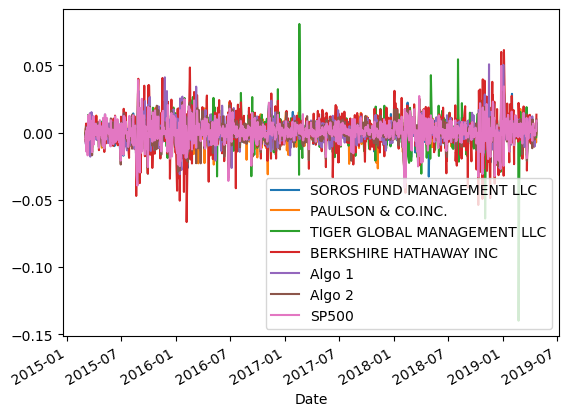

In [16]:
# Plot daily returns of all portfolios
joined_df.plot()

#### Calculate and Plot cumulative returns.

<AxesSubplot:xlabel='Date'>

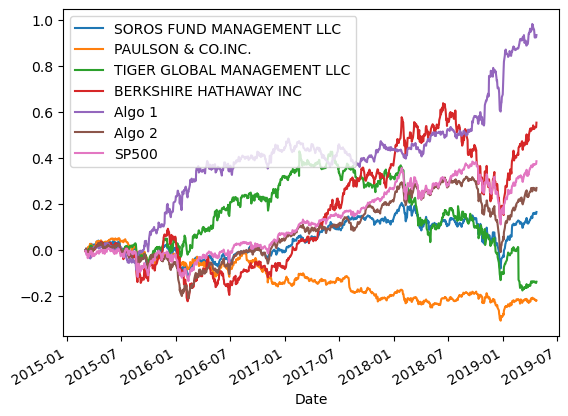

In [17]:
# Calculate cumulative returns of all portfolios
'''
cum_return_srs = (1+joined_df['SOROS FUND MANAGEMENT LLC']).cumprod()-1
cum_return_plsn = (1+joined_df['PAULSON & CO.INC. ']).cumprod()-1
cum_return_tgm = (1+joined_df['TIGER GLOBAL MANAGEMENT LLC']).cumprod()-1
cum_return_bkhy = (1+joined_df['BERKSHIRE HATHAWAY INC']).cumprod()-1
cum_return_algo1 = (1+joined_df['Algo 1']).cumprod()-1
cum_return_algo2 = (1+joined_df['Algo 2']).cumprod()-1
cum_return_sp500 = (1+joined_df['SP500']).cumprod()-1
'''
cum_joined_df = (1+joined_df).cumprod()-1

# Plot cumulative returns
cum_joined_df.plot()

---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

### Create a box plot for each portfolio


[]

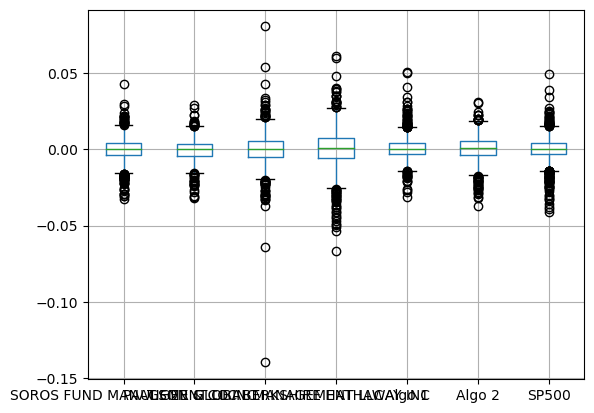

In [18]:
# Box plot to visually show risk
joineddf_box_plot = joined_df.boxplot()
joineddf_box_plot.plot()

### Calculate Standard Deviations

In [19]:
# Calculate the daily standard deviations of all portfolios
std_joineddf = joined_df.std()

### Determine which portfolios are riskier than the S&P 500

In [20]:
# Calculate  the daily standard deviation of S&P 500
sp500_std = joined_df['SP500'].std()

# Determine which portfolios are riskier than the S&P 500
srs_std = joined_df['SOROS FUND MANAGEMENT LLC'].std()
plsn_std = joined_df['PAULSON & CO.INC. '].std()
tgm_std = joined_df['TIGER GLOBAL MANAGEMENT LLC'].std()
bkhy_std = joined_df['BERKSHIRE HATHAWAY INC'].std()
algo1_std =joined_df['Algo 1'].std()
algo2_std =joined_df['Algo 2'].std()

std_dict ={'The S&P500':sp500_std,
           'SOROS FUND MANAGEMENT LLC':srs_std,
            'PAULSON & CO.INC.':plsn_std,
            'TIGER GLOBAL MANAGEMENT LLC': tgm_std,
            'BERKSHIRE HATHAWAY INC': bkhy_std,
            'Algo 1':algo1_std,
            'Algo 2':algo2_std
            } 
for portfolio in std_dict:
    if portfolio > 'The S&P500':
        print (f'{portfolio} is riskier than the S&p500')

### Calculate the Annualized Standard Deviation

In [21]:
# Calculate the annualized standard deviation (252 trading days)
asd_joined_df = std_joineddf * np.sqrt(252)
asd_joined_df.head()

SOROS FUND MANAGEMENT LLC      0.125335
PAULSON & CO.INC.              0.111488
TIGER GLOBAL MANAGEMENT LLC    0.172936
BERKSHIRE HATHAWAY INC         0.205077
Algo 1                         0.120967
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for all portfolios using a 21-day window
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P 500
3. Choose one portfolio, then calculate and plot the 60-day rolling beta between it and the S&P 500

### Calculate and plot rolling `std` for all portfolios with 21-day window

<AxesSubplot:xlabel='Date'>

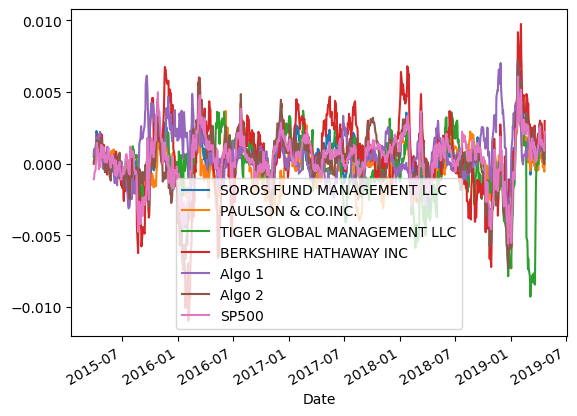

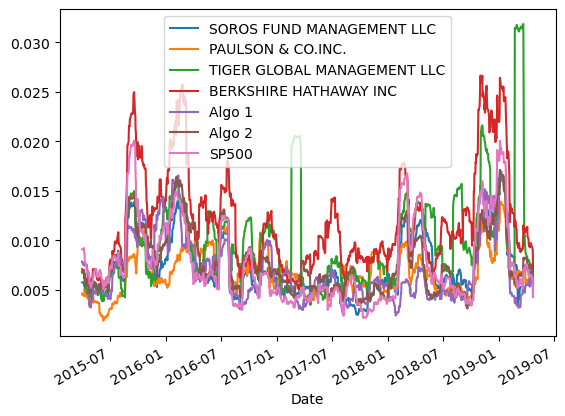

In [22]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
joined_df.rolling(window=21).mean().plot()

# Plot the rolling standard deviation
joined_df.rolling(window=21).std().plot()

### Calculate and plot the correlation

<AxesSubplot:>

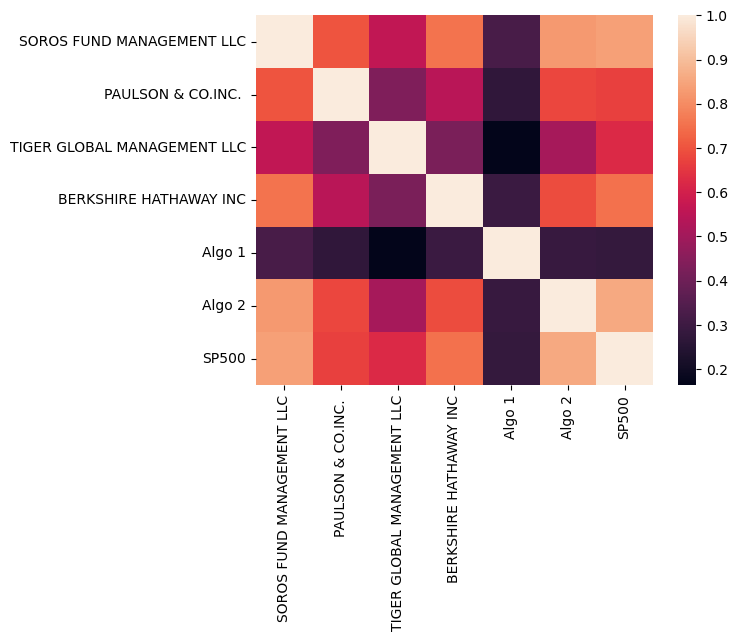

In [23]:
# Calculate the correlation
correlation = joined_df.corr()
# Display de correlation matrix
sns.heatmap(correlation)

### Calculate and Plot Beta for a chosen portfolio and the S&P 500

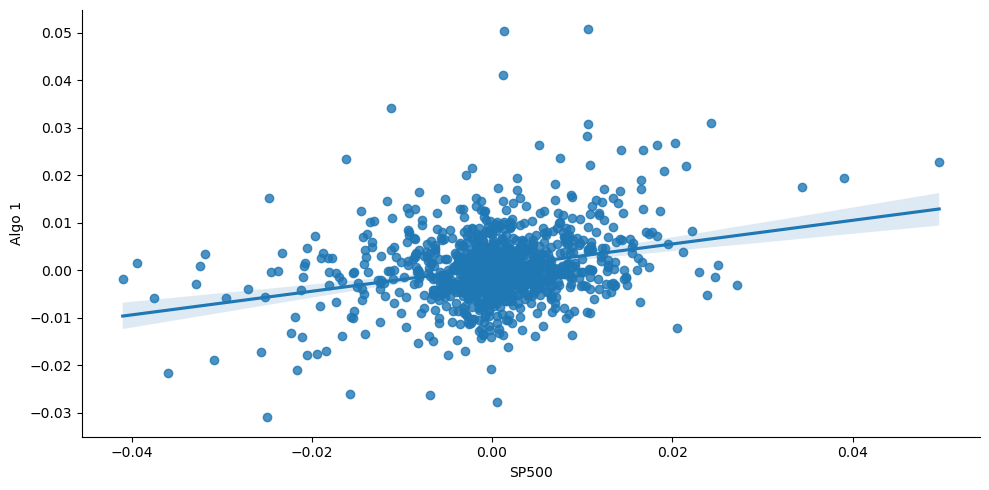

In [24]:
# Calculate covariance of a single portfolio
covariance = joined_df['Algo 1'].cov(joined_df['SP500'])

# Calculate variance of S&P 500
variance = joined_df['SP500'].var()

# Computing beta
algo1_beta = covariance / variance

# Plot beta trend
sns.lmplot(x='SP500', y='Algo 1', data=joined_df, aspect=2)

## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half life for each portfolio, using standard deviation (`std`) as the metric of interest.

In [25]:
# Use `ewm` to calculate the rolling window
ewm_joineddf = joined_df.ewm(halflife=21).mean()

---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [26]:
# Annualized Sharpe Ratios
sharpe_ratios = (joined_df.mean() * 252) / (std_joineddf * np.sqrt(252))

<AxesSubplot:title={'center':'Sharpe Ratios'}>

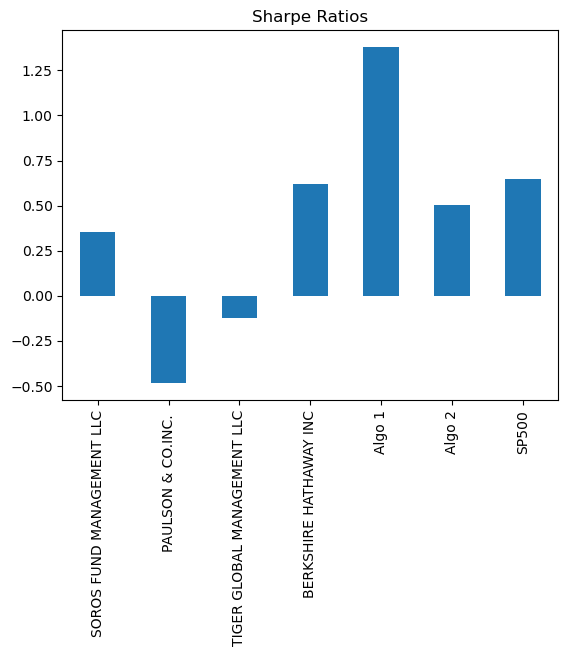

In [27]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios.plot.bar(title='Sharpe Ratios')

### Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.

Write your answer here!

---

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others
5. Include correlation analysis to determine which stocks (if any) are correlated

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [28]:
# Reading data from 1st stock
dis_path = Path('Resources/DIS.csv')
dis_dataframe = pd.read_csv(dis_path, 
                                      index_col="Date", infer_datetime_format=True, parse_dates=True)
dis_dataframe.sort_index(inplace=True)
dis_dataframe = dis_dataframe.rename(columns={
    "Close" : "DIS"
})
#dis_dataframe.head()

In [29]:
# Reading data from 2nd stock
plug_path = Path('Resources/PLUG.csv')
plug_dataframe = pd.read_csv(plug_path, 
                                      index_col="Date", infer_datetime_format=True, parse_dates=True)
plug_dataframe.sort_index(inplace=True)
plug_dataframe = plug_dataframe.rename(columns={
    "Close" : "PLUG"
})
#plug_dataframe.head()

In [30]:
# Reading data from 3rd stock
tsla_path = Path('Resources/TSLA.csv')
tsla_dataframe = pd.read_csv(tsla_path, 
                                      index_col="Date", infer_datetime_format=True, parse_dates=True)
tsla_dataframe.sort_index(inplace=True)
tsla_dataframe = tsla_dataframe.rename(columns={
    "Close" : "TSLA"
})
#tsla_dataframe.head()

In [31]:
# Combine all stocks in a single DataFrame
personal_port_df = pd.concat([dis_dataframe['DIS'], plug_dataframe['PLUG'],tsla_dataframe['TSLA']], axis='columns', join='inner')
personal_port_df.head()


,DIS,PLUG,TSLA
Date,,,
2022-03-21,138.619995,25.809999,307.053345
2022-03-22,140.110001,27.250000,331.326660
2022-03-23,137.639999,27.639999,333.036682
2022-03-24,138.960007,28.459999,337.973328
2022-03-25,139.139999,27.950001,336.880005


In [32]:
# Reset Date index
personal_port_df = personal_port_df.reset_index(drop=True)


In [33]:
# Reorganize portfolio data by having a column per symbol


In [34]:
# Calculate daily returns
daily_returns = personal_port_df.pct_change()

# Drop NAs
daily_returns= daily_returns.dropna()

# Display sample data
daily_returns.head()

,DIS,PLUG,TSLA
1,0.010749,0.055792,0.079052
2,-0.017629,0.014312,0.005161
3,0.009590,0.029667,0.014823
4,0.001295,-0.017920,-0.003235
5,-0.003019,0.004651,0.080345


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [35]:
# Set weights
weights = [1/3, 1/3, 1/3]

# Calculate portfolio return
weighted_return = personal_port_df.dot(weights)
# Display sample data
weighted_return.head()

0    157.161113
1    166.228887
2    166.105560
3    168.464445
4    167.990002
dtype: float64

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [36]:
# Join your returns DataFrame to the original returns DataFrame


In [37]:
# Only compare dates where return data exists for all the stocks (drop NaNs)


## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [38]:
# Calculate the annualized `std`


### Calculate and plot rolling `std` with 21-day window

In [39]:
# Calculate rolling standard deviation

# Plot rolling standard deviation


### Calculate and plot the correlation

In [40]:
# Calculate and plot the correlation


### Calculate and Plot Rolling 60-day Beta for Your Portfolio compared to the S&P 500

In [41]:
# Calculate and plot Beta


### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [42]:
# Calculate Annualized Sharpe Ratios


In [43]:
# Visualize the sharpe ratios as a bar plot


### How does your portfolio do?

Write your answer here!